In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy.linalg as la

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.datasets import make_circles

## Support Vector Machines

* 1st formulated in 1960's by Valdimir Vapnik
![](VladimirVapnik.jpg)
* Implemented in 1990's and became widely used.
    - Outperformed Neural Nets on hand writing recognition
* Supported by statistical learning theory
    - It has the highest VC Dimension (Vapnik, Chervonenkis)
* Classification and regression
* 3 Cases
    - Linearly separable
    - Slightly non-separable
    - Non-linear (completely non-separable)

### Main idea - Linearly Separable Case
 
* Find the widest street (hyperplane) through (separating) the data
* In 2-d hyperplane is a line.
* Many possible lines separating the data
 

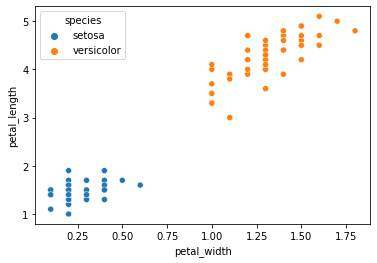

In [7]:
iris = sns.load_dataset('iris')
sns.scatterplot(data = iris.iloc[0:100,:],x='petal_width',y='petal_length',hue= 'species');



* What is the best line?

* The one that maximizes the margin between examples of both classes
![](PossibleHyperplanes.png)


### Intuition
 
* The support vectors are the examples with features that are the most similar to the edge cases of the other class.  
* If you can separate these then the other other (less extreme) examples surely can be classified  
* The support vectors are the data points that lie on the lines that are the "gutters" of the maximum width "road" through the data.


### Hyperplanes

* A n-1 dimensional plane defined in a n-dimensional space by a linear equation
* If n = 2, then a hyperplane is a line. If n=3, then it is a plane.

#### Equation of hyperplane

* The equation for a line can be represented as a dot product

$$y -mx -b = 0 \text{ Equation for a line}$$

$$\vec{w}\cdot \vec{x} = 0\text{ Dot Product}$$

Let $\vec{w} = (-b,-m,1), \vec{x} = (1,x,y)$

$$\vec{w}\cdot \vec{x} = y -mx -b$$

#### Compute distance from hyperplane to a point

* Let b = 0, hyperplane goes through the origin
* $\vec{w}$ is perpendicular to the hyperplane

In [8]:
w = np.array([2,1])
A = np.array([3,4])
print(f'Norm w = {la.norm(w)}')
u = w/la.norm(w)
print(f'Unit vector = {u}') # Direction of w

Norm w = 2.23606797749979
Unit vector = [0.89442719 0.4472136 ]


* Compute distance from point A to hyperplane


![](hyperplane.png)
$$x_2 = -2x_1$$

* Project $\vec{A}$ onto $\vec{w}$
![](hyperplane2.png)

* P is the projection. Calculate $||\vec{p}||$

In [9]:
p = (u.dot(A))*u # p is the projection of A unto u
print(f'p is the projection of A unto u {p}')
p_norm = la.norm(p)
print(f'Length of p =  {p_norm}')

p is the projection of A unto u [4. 2.]
Length of p =  4.47213595499958


#### Margin of hyperplane

margin = 2$||\vec{p}||$

In [10]:
margin = 2*p_norm;margin

8.94427190999916

#### Find width of maximum separating hyperplane

* Find $\vec{w}$ and b of maximum separating hyperplane

![](hyperplane3.png)

Let $\vec{w} = (-m,1), \vec{x} = (x_1,x_2)$, then equation for hyperplane H is: 

$$H: \vec{w}\cdot \vec{x} + b = 0$$

Let $H_1$ be a hyperplane with an intercept 1 greater than H.  
Let $H_0$ be a hyperplane with an intercept 1 less than H.  
H will be equidistant for $H_1$ and $H_0$.

$$H_1: \vec{w}\cdot \vec{x} + b = 1 $$
$$H_0: \vec{w}\cdot \vec{x} + b = -1$$

#### Impose the following constraints:

Assume the classes are $y_i$ = $\{-1,1\}$, for each data point x then
$$\vec{w}\cdot \vec{x_i} + b \ge 1 \text{ for }x_i\text{ having class 1 or} \\
  \vec{w}\cdot \vec{x_i} + b \le 1 \text{ for }x_i\text{ having class -1} $$
  
These two constraints can be combined into 1 constraint:

$$y(\vec{w}\cdot \vec{x} + b) \ge 1 \text{ for all data points}$$

There a many hyperplanes that satisfy this constraint. 



#### Find $\vec{w}$ and b that maximizes the distance between the hyperplanes

Let $x_0$ be a point in the hyperplane $H_0$  

Let m be the margin.  

Let $\vec{u} = \frac{\vec{w}}{||\vec{w}}$, the unit vector perpendicular to the hyperplane

![](hyperplane4.png)

$$ \vec{k} = m\vec{u} = m \frac{\vec{w}}{||\vec{w}||} = \vec{z_0} - \vec{x_0}$$

$\vec{z_0} = \vec{k} + \vec{x_0}$.  

$z_0$ is the point in $H_1$ closest to $x_0$ so:

$$\vec{w} \cdot \vec{z}_0 + b = 1 \\
  \vec{w} \cdot (\vec{x}_0 + \vec{k}) + b = 1 \\
  \vec{w} \cdot (\vec{x}_0 + m \frac{\vec{w}}{||\vec{w}||}) + b = 1 \\
  \vec{w} \cdot \vec{x}_0 + m \frac{||\vec{w}||^2}{||\vec{w}||} + b = 1 \\
  \vec{w} \cdot \vec{x}_0 + b = 1 - m||\vec{w}||$$
  
Substitute -1 for $\vec{w} \cdot \vec{x}_0 + b$ since $\vec{x}_0$ is in $H_0$

$$ m = \frac{2}{||\vec{w}||}$$

This is an optimization problem. We want to maximize m

#### Unconstrained Optimization

<div style="font-size: 115%;">
$$ \underset{w}{\mathrm{argmax}} \frac{2}{ ||\vec{w}||}  =>  \underset{w}{\mathrm{argmax}}  \frac{1}{||\vec{w}||} =>  \underset{w}{\mathrm{argmin}}  ||\vec{w}|| => \underset{w}{\mathrm{argmin}}  \frac{1}{2} ||\vec{w}||^2$$
</div>

#### Constrained Optimization

* Combine the two constraints below into a single equation by using a dummy variable y :  

$\vec{x}_i\vec{w} + b \ge{+1} \text{ for } y_i = +1$  
$\vec{x}_i\vec{w} + b \le{-1} \text{ for } y_i = -1$  


<div style="font-size: 115%;">
$$y_i(\vec{x}_i\vec{w} + b ) - 1 = 0\text{  for }x_i $$
</div>

* Combine with unconstrained optimization to find the hyperplane that minimizes:  

<div style="font-size: 115%;">
$$\frac{1}{2}||\vec{w}||^2 \text{ subject to }y_i(\vec{x}_i\vec{w} + b ) - 1 = 0  \text{  }$$
</div>
* Solve constrained optimization problem using Lagrange Multipliers

#### Largange Multipliers

* Lagrange Multipliers turn constrained optimization problem into unconstrained optimization problem

* f(x,y) - function to optimize, g(x,y) = c constraint function

<div style="font-size: 115%;">
 $$\mathscr{L}(x,y,\alpha) = f(x,y) - \alpha(g(x,y) - c)$$
</div>

* $\alpha$ is the Lagrange Multiplier
    - Often denoted as $\lambda$

* Geometric Interpretation
https://www.youtube.com/watch?v=yuqB-d5MjZA

* $\mathscr{L}$ is called the Lagrangian 

https://www.youtube.com/watch?v=hQ4UNu1P2kw&t=287s&ab_channel=KhanAcademy

#### Find maximum width of margin using Lagrange Multipliers

* i ranges over all the training examples  
* Unconstrained optimization problem, set the gradient of the Lagrangian = 0  

<div style="font-size: 115%;"> 
$$\mathscr{L} = \frac{1}{2}||\vec{w}||^2 - \sum_i\alpha_i[y_i(\vec{x}_i\vec{w} + b) - 1]$$

$$\bigtriangledown_w\mathscr{L} = \vec{0}$$
    
* Solve  
    
$$\frac{\partial{\mathscr{L}}}{\partial{w}} = \vec{w} - \sum_i\alpha_iy_ix_i = 0 \text{ => } \\
 \vec{w} = \sum_i\alpha_iy_ix_i$$
</div>
* $\vec{w}$ is a linear sum of examples
<div style="font-size: 115%;"> 
$$\frac{\partial{\mathscr{L}}}{\partial{b}} = - \sum_i\alpha_iy_i = 0 \text{ => } \\ 
\sum_i\alpha_iy_i = 0$$
</div>
* Sum of the $\alpha_is$ times $y_is$ equal to 0

* Substitute $\vec{w}$ into $\mathscr{L}$:

 <div style="font-size: 115%;"> 
$$\mathscr{L} = \frac{1}{2}(\sum_i\alpha_iy_ix_i)\cdot(\sum_j\alpha_jy_jx_j) - (\sum_i\alpha_iy_ix_i)\cdot(\sum_j\alpha_jy_jx_j) - \sum_i\alpha_iy_ib + \sum_i\alpha_i$$

$$ = \sum_i\alpha_i - \frac{1}{2}\sum_{i}\sum_j\alpha_i\alpha_jy_iy_j(\vec{x}_i\cdot{\vec{x}_j})$$
</div>
* This is a quadratic, so call a Quadratic Programming function to return the maximum margin   

#### Substitute $\vec{w}$ into Decision Rule for unknown example $\vec{u}$

<div style="font-size: 115%;">
$$ \vec{u}\text{  is a positive example if }\vec{w} \cdot{\vec{u}} + b \ge 0 \\
\text{if } \sum_i\alpha_iy_i(x_i \cdot{\vec{u}}) + b \ge 0 \text{ then positive example}$$
 </div>
  
#### Notice both the optimization and the decision rule only depend on the dot product between examples
 
* Remember the Dot product is a similarity measure.

### Slightly Non-Separable Case

* Soft Margins
 

![](SlightlyNonSep.png)

* Allow for some errors:

$\vec{x}_i\vec{w} + b \ge{+1} - \epsilon_i \text{ for } y_i = +1$

$\vec{x}_i\vec{w} + b \le{-1} + \epsilon_i \text{ for } y_i = -1$ 

$\epsilon_i > 0 \text{  } \forall{i}$

![](SoftMargin.png)

* Minimize:

$$\frac{1}{2}||\vec{w}||^2 + C \sum_i \epsilon_i \text{ subject to }y_i(\vec{x}_i\vec{w} + b ) \ge 1 - \epsilon_i  \text{  }\forall{i}$$

* C controls how much weight the optimizer is to put on allowing mis-classifications.
    - Large C implies none or very few mis-classifications allowed as support vectors.
* It turns out the it is the same Lagranian except with the additional constraint that the multipliers must be less than or equal C.
* $\epsilon$ is called the slack variable

#### Sklearn SVM Classification (linear)

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

* SVM is not scale invariant: Scale the data
* SVM uses  random number generation
* Keywords:
    * Linear Kernel: <x,x'>
    * C: Penalty parameter of error term, defaults to 1
        - small C: allow misclassifications
        - large C: penalize misclassifications

In [11]:
df = pd.read_csv('PurchaseData.csv')
df.tail()

,Gender,Age,Salary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


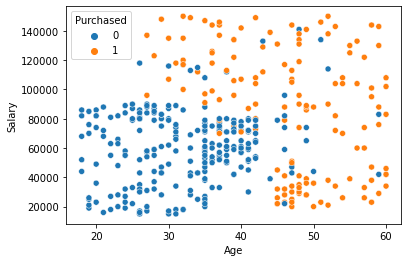

In [12]:
sns.scatterplot(x='Age',y='Salary',hue = 'Purchased',data = df);

In [13]:
X = df.iloc[:, [1, 2]].values # Age and Salary
y = df.iloc[:, 3].values # Purchased

# Split the data into the training and test

X_train,X_test,y_train,y_test = train_test_split(X, y, 
                                                 test_size = 0.25,
                                                 random_state = 1234,
                                                 stratify= y)

# Scale Age and Salary features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [14]:
# Fit SVM model to the training data

model = SVC(C = 1.0, kernel = 'linear', random_state = 0)
model.fit(X_train, y_train)

# Predict the test data
yhat = model.predict(X_test)

In [15]:
def accuracy(cm):
    return np.trace(cm)/np.sum(cm)

def precision(cm):
    return cm[1,1]/(cm[1,1]+cm[0,1])

def recall(cm):
    return cm[1,1]/(cm[1,1] + cm[1,0])

In [16]:
# Make the Confusion Matrix and compute accuracy
cm = confusion_matrix(y_test, yhat)
print("Confusion Matrix:")
print(cm)
print(f'Accuracy: {accuracy(cm)}\nPrecision: {precision(cm)}\nRecall: {recall(cm)}')

Confusion Matrix:
[[61  3]
 [17 19]]
Accuracy: 0.8
Precision: 0.8636363636363636
Recall: 0.5277777777777778


In [17]:
print("Model Score: ",model.score(X_test,y_test))
print("Number of Support Vectors: ",model.n_support_)
print("Index of Support Vectors: ",model.support_)
model.support_vectors_.shape

Model Score:  0.8
Number of Support Vectors:  [58 60]
Index of Support Vectors:  [  1   2   3   8  11  25  31  32  37  41  43  49  56  64  65  79  82  84
  87  94 111 117 123 129 130 140 152 154 155 160 161 170 173 175 179 183
 199 203 210 213 223 225 233 239 243 244 246 251 257 264 266 272 278 279
 280 287 291 293   0  12  17  19  23  28  35  38  39  42  60  69  74  77
  78  81  89  91  97  98  99 107 108 110 121 122 134 135 141 144 146 153
 156 163 174 177 178 191 193 196 206 211 214 216 217 218 222 224 226 231
 253 259 260 270 277 283 286 288 292 297]


(118, 2)

#### Decision Boundary

* Plot decision boundary between the classes
* Only for two classes

In [18]:
from matplotlib.colors import ListedColormap
def classification_plot(X_data,y_data,model,ax):
    # Make grid: min to max of 1st column, min to max of 2nd column in small increments
    X1,X2 = np.meshgrid(np.arange(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1, step = 0.01),
                     np.arange(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1, step = 0.01))
    # Flatten X1 and X2, create an array and transpose to a 2-column array (one for each feature)
    v = np.array([X1.ravel(), X2.ravel()]).T
    #  Using fitted model, predict the points in v and reshape to a 2-dimensional array
    ax.contourf(X1, X2, model.predict(v).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('magenta','cyan')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_data)): # For each class
        ax.scatter(X_data[y_data == j, 0], X_data[y_data == j, 1],
                c = np.array(ListedColormap(('white', 'black'))(i)).reshape(1,-1), label = j)


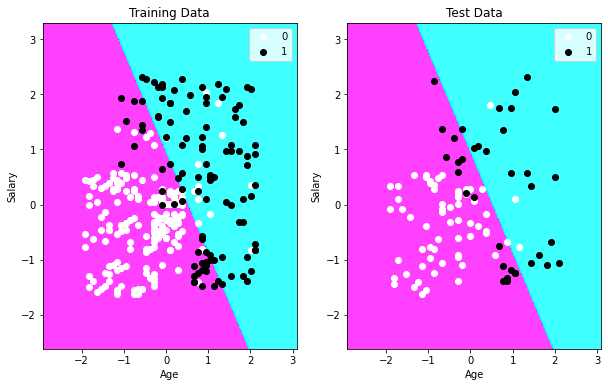

In [19]:
# Plot Results
fig,(ax1,ax2)=plt.subplots(1,2,figsize = (10,6))

# Visualising the Training set results
classification_plot(X_train,y_train,model, ax1)
ax1.set_title('Training Data')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.legend()

# Visualising the Test set results
classification_plot(X_test,y_test, model, ax2)
ax2.set_title('Test Data')
ax2.set_xlabel('Age')
ax2.set_ylabel('Salary')
ax2.legend();

#### Multiple Classes (3 or more)

* decision_function_shape keyword: recommended 'ovr' (the default)



### Non-linear SVM

* How to separate non-linear data with a hyperplane
* The data below cannot be separated with a hyperplane

(100, 2) (100,)


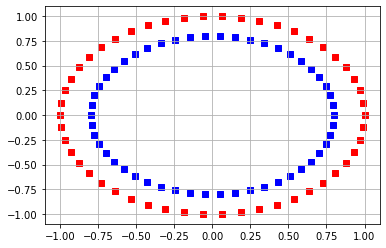

In [20]:
cmap = ListedColormap(["red", "blue"])
x_,y_ = make_circles()
print(x_.shape,y_.shape)
plt.scatter(x_[:,0], x_[:,1], c=y_, cmap=cmap, marker='s')
plt.grid()

* The decision rule is not a linear function of the data?

* Polynomial, logrithmic, etc decision boundaries

* The fact that the solution of the optimization problem only depended on pairwise dot products of the data is the key

#### The Kernel Methods

* Map the data to a higher dimension
 
![](data_2d_to_3d.png)

* SVM with polynomial visualization

https://www.youtube.com/watch?v=3liCbRZPrZA


* Map data to a higher dimension to separate $\phi: R^2 -> R^3$ 
 
$\phi((x_1,x_2)) -> (z_1,z_2,z_3) $

* Now apply SVM algorithm in the higher dimension and then project the decision boundary back onto original dimension
    - Compute $\phi(x_1)\cdot\phi(x_2)$

* But computing the transformation could be computationally impractical

#### Kernel Trick
 
* To solve the optimization problem in the higher dimension only the dot product of $\phi(x_1)\phi(x_2)$ is calculated.
* But this is just a number!! 
* Are there any functions in the lower dimension that map $(x_i,x_j) -> \phi(x_i)\cdot\phi(x_j)$
* Yes, there are!! Kernel functions (see Mercer's Theorem)

#### Kernel Functions

* <> is the inner (i.e. dot) product
* $\gamma$ is the gamma keyword in sklearn.svm.SVC
* r is the coef0 keyword in sklearn.svm.SVC

* Polynomial: 
$$K(\vec{x},\vec{z}) = ((\gamma(<\vec{x},\vec{z}>) + r)^d$$

* Gaussian (Radial Basis Functions): 
$$K(\vec{x},\vec{z}) = exp(-\gamma||\vec{x} - \vec{z}||^2) \text{ where }\gamma > 0$$

* Hypertangent: 
$$K(\vec{x},\vec{z}) = tanh(\gamma( <\vec{x},\vec{z}>) + r)$$



#### Kernel Method for Polynomial 

<div style="font-size: 115%;"> 
 
$\vec{x} = (x_1,x_2)$  

$\vec{z} = (z_1,z_2)$  
</div>

* Let $\gamma = 1$, d = 2 and r = 0 

<div style="font-size: 115%;"> 
$K(\vec{x},\vec{z}) = <\vec{x},\vec{z}>^2$  
</div>

* <> is the inner (i.e. dot) product  

<div style="font-size: 115%;"> 
$$K(\vec{x},\vec{z}) = <\vec{x},\vec{z}>^2$$  
$$ = (x_1z_1 + x_2z_2)^2$$  
$$ = (x_1^2z1^2 + 2x_1z_1x_2z_2 + x_2^2z_2^2)$$  
$$ = <(x_1^2,\sqrt{2}x_1x_2,x_2^2), (z_1^2,\sqrt{2}z_1z_2,z_2^2)>$$  
$$ = <\Phi(\vec{x}),\Phi(\vec{z})>$$  
</div>

* Implicit $\Phi$: $\Phi(\vec{x}) = (x_1^2,\sqrt{2}x_1x_2,x_2^2) $

<div style="font-size: 105%;"> 
$(x_1^2,\sqrt{2}x_1x_2,x_2^2) \cdot{(z_1^2,\sqrt{2}z_1z_2,z_2^2)} = (x_1^2z_1^2 + 2x_1z_1x_2z_2 + x_2^2z_2^2) $


</div>

* $\phi: R^2 -> R^3$ is never done. Amazing!

#### Even more amazing: the transformation space can be infinite dimensional

* Let K be the Radial Basis Function Kernel with $\gamma = 1$ and x,z are scalars

<div style="font-size: 115%;"> 
$$K(x,z) = exp(-(x - z)^2$$ 
$$ = exp(-x)^2*exp(-z^2)\sum_{k=0}^{k=\infty}\frac{2^kx^kz^k}{k!}$$
</div>

* $\sum_{k=0}^{k=\infty}\frac{2^kx^kz^k}{k!}$ is the Taylor Series expansion of exp(2xz)  
* Summing to infinity puts the transformation in infinite dimensional space  
    - but this is OK since we never actually do the transformation

#### sklearn SVM Classification (non-linear)

* SVM is not scale invariant: Scale the data
* SVM uses  random number generation
* Keywords:
    * Radial Basis Function (rbf): Kernel:
    * C: Penalty parameter of error term, defaults to 1
    * Gamma: kernel coefficient
        - Small gamma: less complexity, 
        - Large gamma: more complexity


![](https://www.youtube.com/watch?v=3liCbRZPrZA)

In [21]:
# Preporcessing

X = df.iloc[:, [1, 2]].values
y = df.iloc[:, 3].values

# Split the data into the training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 1234,stratify= y)

# Scale Age and Salary features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [22]:
# Fit SVM model to the training data
model = SVC(C = 100, kernel = 'rbf', gamma = 'auto', random_state = 1234)
model.fit(X_train, y_train)

SVC(C=100, gamma='auto', random_state=1234)

In [23]:
# Predict the test data
yhat = model.predict(X_test)

In [24]:
# Make the Confusion Matrix and compute accuracy
cm = confusion_matrix(y_test, yhat)
print("Confusion Matrix:")
print(cm)
print(f'Accuracy: {accuracy(cm)}\nPrecision: {precision(cm)}\nRecall: {recall(cm)}')

Confusion Matrix:
[[59  5]
 [ 8 28]]
Accuracy: 0.87
Precision: 0.8484848484848485
Recall: 0.7777777777777778


In [25]:
print(model.score(X_test,y_test))
print(model.n_support_)
print(model.support_)
model.support_vectors_.shape

0.87
[33 37]
[  1   2   3  25  31  37  49  56  64  65  79  84  87 117 118 123 154 155
 170 175 179 183 204 225 239 244 256 264 266 280 291 298 299  12  13  20
  23  53  68  69  74  77  91  95  97  98 110 122 135 146 153 163 169 177
 178 191 192 193 211 222 224 236 237 248 250 259 268 270 284 292]


(70, 2)

#### Decision Boundary

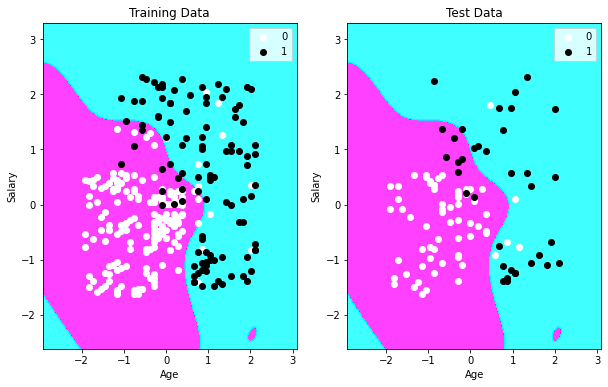

In [26]:
# Plot Results
fig,(ax1,ax2)=plt.subplots(1,2,figsize = (10,6))

# Visualising the Training set results
classification_plot(X_train,y_train,model, ax1)
ax1.set_title('Training Data')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.legend()

# Visualising the Test set results
classification_plot(X_test,y_test, model, ax2)
ax2.set_title('Test Data')
ax2.set_xlabel('Age')
ax2.set_ylabel('Salary')
ax2.legend();


### Pros and Cons

#### Pros
* Works well with high dimensional data
* Good for small data sets

#### Cons
* Requires picking the right kernel and parameters which can be computationally expensive

### SVM Regression

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

* Must scale the independent and dependent variables

In [27]:
salary = pd.read_csv('Salaries.csv')
salary.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [28]:
X = salary.loc[:,"Level"].values
y = salary.loc[:,"Salary"].values
X = X.reshape(-1,1)
X.shape,y.shape

((10, 1), (10,))

In [29]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(10,1))
y.shape

(10, 1)

In [30]:
# Fit model
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X, y[:,0])

SVR()

In [31]:
# Predict a new result
new_X = 6.5
y_pred = model.predict(sc_X.transform(np.array([[new_X]])))
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([170370.0204065])

Text(0, 0.5, 'Salary')

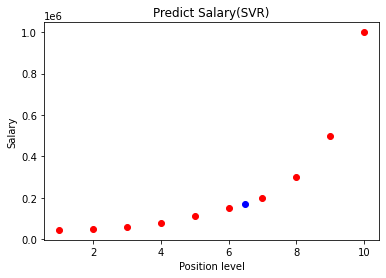

In [32]:
# Visualise the SVR results 
X_ = sc_X.inverse_transform(X)
y_ = sc_y.inverse_transform(y)
plt.scatter(X_, y_, color = 'red')
#plt.plot(X_grid, m.predict(X_grid), color = 'blue')
plt.scatter(new_X, y_pred, color = 'blue')

plt.title('Predict Salary(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')

### References

Alexander Kowalczyk: https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/  
                     https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/
                     

Patrick Winston: https://www.youtube.com/watch?v=_PwhiWxHK8o&t=2309s

Alexander Ihler: https://www.youtube.com/watch?v=IOetFPgsMUc